In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
import pandas as pd
import yaml
import numpy as np
import os
from PIL import Image
import glob
#%matplotlib inline

In [2]:
# Select map
MAP_NAME = "Spa_map"

In [3]:
csv_files = glob.glob(f'/home/weins/sim_ws/csv/*spa*', recursive=False)
for i, x in enumerate(csv_files):
    print(f"[{i}]: {x}")

[0]: /home/weins/sim_ws/csv/pp_spa_controls_out.csv
[1]: /home/weins/sim_ws/csv/mpc_spa_hp_final_out.csv
[2]: /home/weins/sim_ws/csv/mpc_spa_hp_controls_out.csv
[3]: /home/weins/sim_ws/csv/mpc_spa_fast_final_out.csv
[4]: /home/weins/sim_ws/csv/mpc_spa_safe_controls_out.csv
[5]: /home/weins/sim_ws/csv/spa_pp_final_out.csv
[6]: /home/weins/sim_ws/csv/mpc_spa_safe_final_out.csv
[7]: /home/weins/sim_ws/csv/traj_race_spa_v2.csv
[8]: /home/weins/sim_ws/csv/traj_race_spa.csv
[9]: /home/weins/sim_ws/csv/spa_mpc_final_out.csv
[10]: /home/weins/sim_ws/csv/trajrace_pp_spa.csv
[11]: /home/weins/sim_ws/csv/mpc_spa_fast_controls_out.csv
[12]: /home/weins/sim_ws/csv/pp_spa_final_out.csv


In [4]:
spa_length = len(pd.read_csv(csv_files[7], sep=','))+1
spa_length

3640

In [5]:
spa_pp_length = len(pd.read_csv(csv_files[10], sep=','))+1
spa_pp_length

1093

## MPC Configurazione High Performance

In [6]:
# Select file index
row = 2

In [7]:
raw_data = pd.read_csv(csv_files[row], sep=',')
raw_data

,x,y,theta,speed,accel
0,11.267927,-66.087634,-0.016620,9.771721,-4.409007
1,11.334710,-65.899450,-0.015908,9.861721,3.000000
2,11.400086,-65.711864,-0.010511,9.951721,3.000000
3,11.423581,-65.680772,-0.015853,9.976995,0.048727
4,11.464328,-65.524712,-0.005033,9.945706,-0.200492
...,...,...,...,...,...
3635,11.093596,-66.559675,-0.024025,9.990857,-2.837657
3636,11.089653,-66.517168,0.027671,9.928684,-3.939467
3637,11.164661,-66.370828,-0.021305,9.875730,-3.837569
3638,11.233956,-66.181864,-0.020160,9.903991,0.942054


### PP

In [6]:
raw_data_pp = pd.read_csv(csv_files[12], sep=',')
raw_data_pp

,x,y,theta,speed,accel,dist,energy,theta_map
0,11.485003,-65.464767,0.023955,8.909831,-0.996297,0.638211,5.058107,-0.377448
1,11.640409,-65.046057,0.020316,8.864450,-0.991209,0.118529,4.804737,-0.348457
2,11.845589,-64.459115,0.009412,8.819069,-0.961077,0.217058,4.629923,-0.332399
3,12.007048,-63.954592,0.001005,8.774844,-0.940139,0.241211,4.500777,-0.315539
4,12.131627,-63.533153,0.001549,8.731365,-0.935469,0.181902,4.448304,-0.298246
...,...,...,...,...,...,...,...,...
1086,10.328565,-68.231845,0.003221,9.192522,-1.088109,0.177116,5.483137,-0.452438
1087,10.522374,-67.813615,0.002321,9.144480,-1.082408,0.144794,5.426818,-0.436735
1088,10.779594,-67.226203,0.007921,9.049396,-1.045242,0.257984,5.422904,-0.421090
1089,10.955013,-66.806165,0.013756,9.002518,-1.039813,0.214818,5.577044,-0.405910


In [7]:
raw_data_pp.loc[0, "dist"] = raw_data_pp.dist.mean()
(raw_data_pp.dist.min(), raw_data_pp.dist.max())

(0.0500647890751528, 0.3310722555424193)

In [10]:
# Image resolution
size = 20 #40

# Select third dimention column index (color)
# [2] angle
# [3] velocity
# [4] acceleration
i = 'theta'

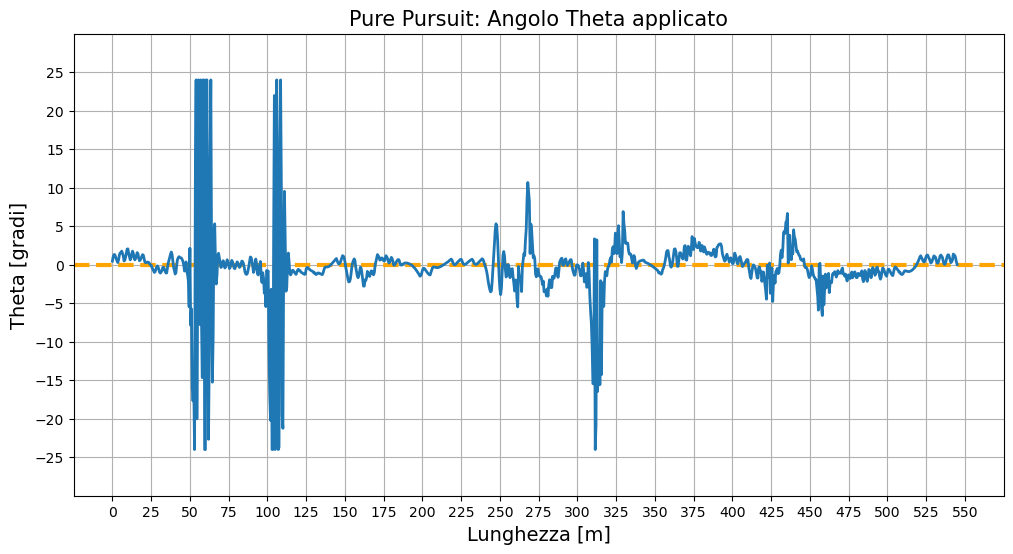

In [127]:
# Overlay the racetrack on the map
# load map yaml
if os.path.exists(f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"):
    map_img_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"
else:
    raise Exception("Map not found!")

map_yaml_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.yaml"
with open(map_yaml_path, 'r') as yaml_stream:
    try:
        map_metadata = yaml.safe_load(yaml_stream)
        map_resolution = map_metadata['resolution']
        origin = map_metadata['origin']
    except yaml.YAMLError as ex:
        print(ex)


# Normalize the color values
#norm = mcolors.Normalize(vmin=transformed_data_pp.loc[:, i].min(), vmax=transformed_data_pp.loc[:, i].max())


%matplotlib inline
# Assuming you have 2944 waypoints and each waypoint is 0.15m apart
distance_per_waypoint = 0.5
spa_length = np.arange(0, (spa_pp_length-2) * distance_per_waypoint, distance_per_waypoint)

# Assuming `i` is the index of the column containing theta values
theta_values = raw_data_pp.loc[:, i].to_numpy()*180/np.pi

%matplotlib inline
plt.figure(figsize=(12, 6))
plt.title("Pure Pursuit: Angolo Theta applicato", fontsize=15)
plt.axhline(y=0, color='orange', linestyle='--', linewidth=3)
plt.plot(spa_length, theta_values, linewidth=2)
plt.grid(True)

plt.xlabel('Lunghezza [m]', fontsize=14)  # Add x-axis label
plt.ylabel('Theta [gradi]', fontsize=14)  # Add y-axis label
plt.xticks(np.arange(0, spa_length[-1] + 10, 25), fontsize=10)
plt.yticks(np.arange(-25, 26, 5), fontsize=10)  # Increase y-axis tick font size
plt.ylim(-30, 30)
plt.xlim(-25, 575)
# Save the figure as an image file
plt.savefig('MPC and PP/PP Theta Spa.png', dpi=300, bbox_inches='tight')

plt.show()

### MPC HP

In [128]:
# Image resolution
size = 20 #40

# Select third dimention column index (color)
# [2] angle
# [3] velocity
# [4] acceleration
i = 'theta'

In [129]:
spa_length = len(pd.read_csv(csv_files[row], sep=','))
spa_length

3640

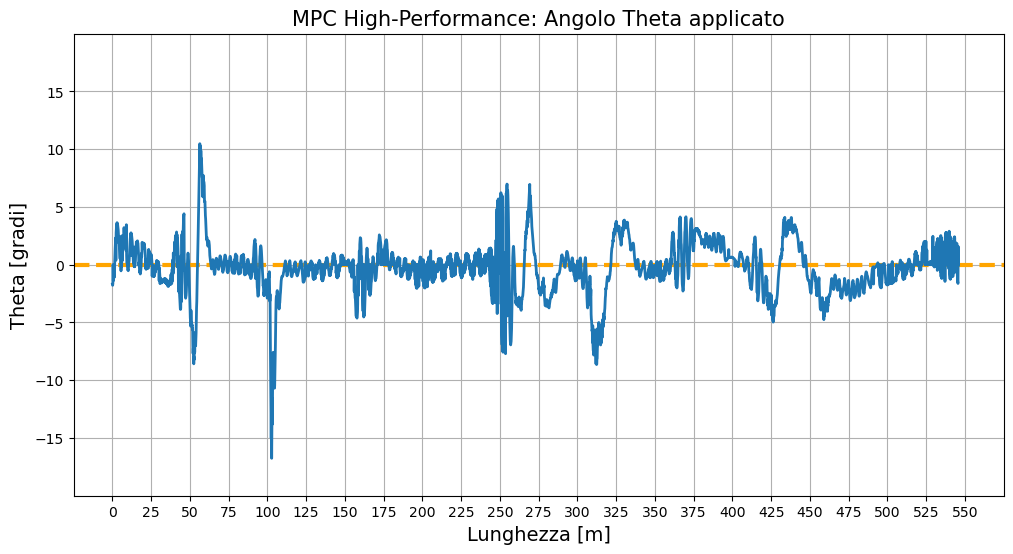

In [130]:
# Overlay the racetrack on the map
# load map yaml
if os.path.exists(f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"):
    map_img_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"
else:
    raise Exception("Map not found!")

map_yaml_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.yaml"
with open(map_yaml_path, 'r') as yaml_stream:
    try:
        map_metadata = yaml.safe_load(yaml_stream)
        map_resolution = map_metadata['resolution']
        origin = map_metadata['origin']
    except yaml.YAMLError as ex:
        print(ex)


# Normalize the color values
#norm = mcolors.Normalize(vmin=transformed_data_pp.loc[:, i].min(), vmax=transformed_data_pp.loc[:, i].max())


%matplotlib inline
# Assuming you have 2944 waypoints and each waypoint is 0.15m apart
num_waypoints = spa_length
distance_per_waypoint = 0.15
length = np.arange(0, num_waypoints * distance_per_waypoint, distance_per_waypoint)

# Assuming `i` is the index of the column containing theta values
theta_values = raw_data.loc[:, i].to_numpy()*180/np.pi

%matplotlib inline
plt.figure(figsize=(12, 6))
plt.title("MPC High-Performance: Angolo Theta applicato", fontsize=15)
plt.axhline(y=0, color='orange', linestyle='--', linewidth=3)
plt.plot(length, theta_values, linewidth=2)
plt.grid(True)

plt.xlabel('Lunghezza [m]', fontsize=14)  # Add x-axis label
plt.ylabel('Theta [gradi]', fontsize=14)  # Add y-axis label
plt.xticks(np.arange(0, length[-1] + 10, 25), fontsize=10)
plt.yticks(np.arange(-15, 16, 5), fontsize=10)  # Increase y-axis tick font size
plt.ylim(-20, 20)
plt.xlim(-25, 575)
# Save the figure as an image file
plt.savefig('MPC Profiles Comparisons/MPC High Performance Theta Spa.png', dpi=300, bbox_inches='tight')

plt.show()

In [131]:
original = pd.read_csv(csv_files[7], sep=',', names=['x', 'y', 'theta', 'speed'])
original

,x,y,theta,speed
0,11.175317,-66.022806,-0.377448,10.267294
1,11.230135,-65.883709,-0.373357,10.251275
2,11.284422,-65.744271,-0.369176,10.235257
3,11.338161,-65.604497,-0.364904,10.219238
4,11.391333,-65.464394,-0.360540,10.203220
...,...,...,...,...
3635,10.949108,-66.579835,-0.394222,10.436610
3636,11.006471,-66.441106,-0.389941,10.436610
3637,11.063287,-66.302025,-0.385718,10.436610
3638,11.119566,-66.162592,-0.381553,10.436610


In [132]:
raw_data[(raw_data['theta'] == 0.0) & (raw_data['speed'] == 0.0) & (raw_data['accel'] == 0.0)] = np.nan
raw_data

,x,y,theta,speed,accel
0,11.252556,-66.085522,-0.029345,9.768604,-3.418571
1,11.322046,-65.897724,-0.031116,9.858604,3.000000
2,11.389490,-65.710608,-0.028765,9.948604,3.000000
3,11.440405,-65.611634,0.000368,10.051606,3.000000
4,11.487512,-65.430147,-0.024227,10.008797,2.024023
...,...,...,...,...,...
3635,11.070048,-66.554601,-0.022512,9.993710,-2.804301
3636,11.107572,-66.460927,-0.026493,10.018033,0.810764
3637,11.181067,-66.273370,-0.028279,9.871161,-4.895734
3638,11.221178,-66.170284,0.027456,9.916342,-2.447743


In [133]:
spa_length = len(pd.read_csv(csv_files[row], sep=','))
spa_length

3640

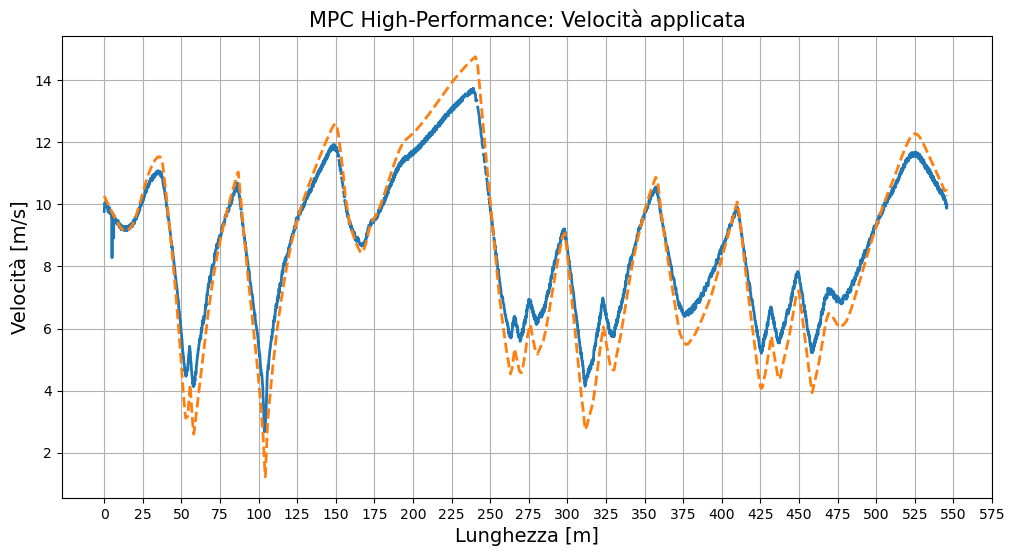

In [134]:
# Overlay the racetrack on the map
# load map yaml
if os.path.exists(f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"):
    map_img_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"
else:
    raise Exception("Map not found!")

map_yaml_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.yaml"
with open(map_yaml_path, 'r') as yaml_stream:
    try:
        map_metadata = yaml.safe_load(yaml_stream)
        map_resolution = map_metadata['resolution']
        origin = map_metadata['origin']
    except yaml.YAMLError as ex:
        print(ex)



# Normalize the color values
#norm = mcolors.Normalize(vmin=transformed_data_pp.loc[:, i].min(), vmax=transformed_data_pp.loc[:, i].max())


%matplotlib inline

# Assuming `i` is the index of the column containing theta values
#theta_values = transformed_data.loc[:, i].to_numpy()  # Replace with your actual theta values

%matplotlib inline
plt.figure(figsize=(12, 6))
plt.title("MPC High-Performance: Velocità applicata", fontsize=15)
#plt.axhline(y=0, color='orange', linestyle='--', linewidth=3)
# Assuming you have 2944 waypoints and each waypoint is 0.15m apart
num_waypoints = spa_length
distance_per_waypoint = 0.15
length = np.arange(0, num_waypoints * distance_per_waypoint, distance_per_waypoint)
plt.plot(length, raw_data.loc[:, 'speed'].to_numpy(), linewidth=2)
length = np.arange(0, num_waypoints * distance_per_waypoint, distance_per_waypoint)

plt.plot(length, original['speed'].to_numpy(), linestyle='--', linewidth=2)
plt.grid(True)

plt.xlabel('Lunghezza [m]', fontsize=14)  # Add x-axis label
plt.ylabel('Velocità [m/s]', fontsize=14)  # Add y-axis label
plt.xticks(np.arange(0, length[-1]+50, 25), fontsize=10)
plt.yticks(fontsize=10)  # Increase y-axis tick font size
#plt.ylim(theta_values.min() - 0.05, theta_values.max() + 0.03)
# Save the figure as an image file
plt.savefig('MPC Profiles Comparisons/MPC High Performance Speed Spa.png', dpi=300, bbox_inches='tight')

plt.show()

## MPC Configurazione Fast

In [135]:
csv_files = glob.glob(f'/home/weins/sim_ws/csv/*spa*', recursive=False)
for i, x in enumerate(csv_files):
    print(f"[{i}]: {x}")

[0]: /home/weins/sim_ws/csv/pp_spa_controls_out.csv
[1]: /home/weins/sim_ws/csv/mpc_spa_hp_final_out.csv
[2]: /home/weins/sim_ws/csv/mpc_spa_hp_controls_out.csv
[3]: /home/weins/sim_ws/csv/mpc_spa_fast_final_out.csv
[4]: /home/weins/sim_ws/csv/mpc_spa_safe_controls_out.csv
[5]: /home/weins/sim_ws/csv/spa_pp_final_out.csv
[6]: /home/weins/sim_ws/csv/mpc_spa_safe_final_out.csv
[7]: /home/weins/sim_ws/csv/traj_race_spa_v2.csv
[8]: /home/weins/sim_ws/csv/traj_race_spa.csv
[9]: /home/weins/sim_ws/csv/spa_mpc_final_out.csv
[10]: /home/weins/sim_ws/csv/trajrace_pp_spa.csv
[11]: /home/weins/sim_ws/csv/mpc_spa_fast_controls_out.csv
[12]: /home/weins/sim_ws/csv/pp_spa_final_out.csv


In [136]:
# Select file index
row = 11

In [137]:
raw_data = pd.read_csv(csv_files[row], sep=',')
raw_data

,x,y,theta,speed,accel
0,11.315927,-66.097466,0.006560,10.209031,-1.113191
1,11.386573,-65.903329,0.011303,10.192009,-0.567419
2,11.298833,-65.698166,0.011031,2.790000,3.000000
3,11.456196,-65.709588,0.014663,10.170479,-0.717650
4,11.524919,-65.516232,0.016846,10.146655,-0.794144
...,...,...,...,...,...
3635,11.135069,-66.584200,-0.001308,10.320083,-1.547493
3636,11.163162,-66.485015,0.032253,10.294699,-0.776564
3637,11.208204,-66.389404,0.001351,10.286163,-1.130668
3638,11.244363,-66.292009,0.002994,10.242427,-1.457850


In [138]:
# Image resolution
size = 20 #40

# Select third dimention column index (color)
# [2] angle
# [3] velocity
# [4] acceleration
i = 'theta'

In [139]:
spa_length = len(pd.read_csv(csv_files[row], sep=','))
spa_length

3640

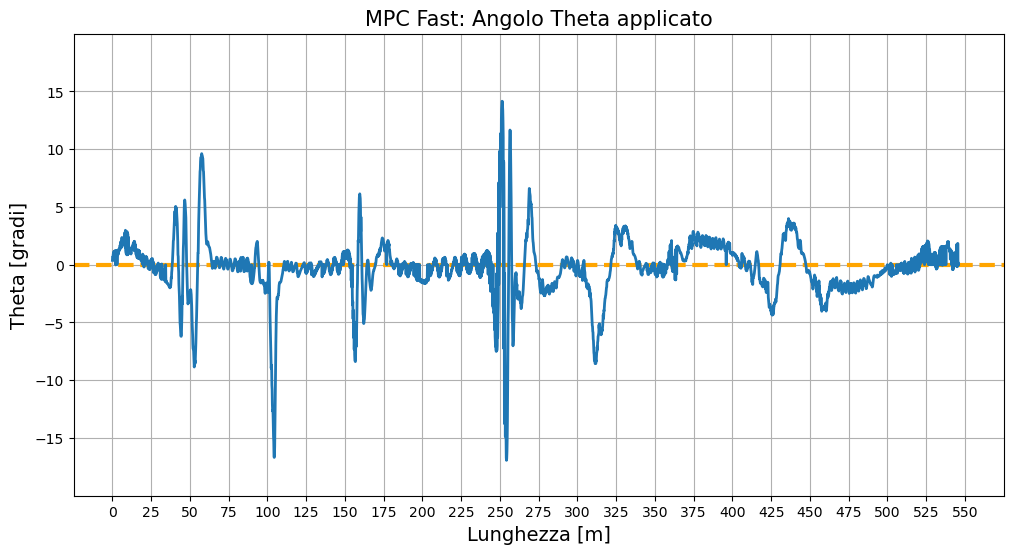

In [140]:
# Overlay the racetrack on the map
# load map yaml
if os.path.exists(f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"):
    map_img_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"
else:
    raise Exception("Map not found!")

map_yaml_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.yaml"
with open(map_yaml_path, 'r') as yaml_stream:
    try:
        map_metadata = yaml.safe_load(yaml_stream)
        map_resolution = map_metadata['resolution']
        origin = map_metadata['origin']
    except yaml.YAMLError as ex:
        print(ex)

# Normalize the color values
#norm = mcolors.Normalize(vmin=transformed_data_pp.loc[:, i].min(), vmax=transformed_data_pp.loc[:, i].max())


%matplotlib inline
# Assuming you have 2944 waypoints and each waypoint is 0.15m apart
num_waypoints = spa_length
distance_per_waypoint = 0.15
length = np.arange(0, num_waypoints * distance_per_waypoint, distance_per_waypoint)

# Assuming `i` is the index of the column containing theta values
theta_values = raw_data.loc[:, i].to_numpy()*180/np.pi

%matplotlib inline
plt.figure(figsize=(12, 6))
plt.title("MPC Fast: Angolo Theta applicato", fontsize=15)
plt.axhline(y=0, color='orange', linestyle='--', linewidth=3)
plt.plot(length, theta_values, linewidth=2)
plt.grid(True)

plt.xlabel('Lunghezza [m]', fontsize=14)  # Add x-axis label
plt.ylabel('Theta [gradi]', fontsize=14)  # Add y-axis label
plt.xticks(np.arange(0, length[-1] + 10, 25), fontsize=10)
plt.yticks(np.arange(-15, 16, 5), fontsize=10)  # Increase y-axis tick font size
plt.ylim(-20, 20)
plt.xlim(-25, 575)
# Save the figure as an image file
plt.savefig('MPC Profiles Comparisons/MPC Fast Theta Spa.png', dpi=300, bbox_inches='tight')

plt.show()

In [141]:
original = pd.read_csv(csv_files[7], sep=',', names=['x', 'y', 'theta', 'speed'])
original

,x,y,theta,speed
0,11.175317,-66.022806,-0.377448,10.267294
1,11.230135,-65.883709,-0.373357,10.251275
2,11.284422,-65.744271,-0.369176,10.235257
3,11.338161,-65.604497,-0.364904,10.219238
4,11.391333,-65.464394,-0.360540,10.203220
...,...,...,...,...
3635,10.949108,-66.579835,-0.394222,10.436610
3636,11.006471,-66.441106,-0.389941,10.436610
3637,11.063287,-66.302025,-0.385718,10.436610
3638,11.119566,-66.162592,-0.381553,10.436610


In [142]:
raw_data[(raw_data['theta'] == 0.0) & (raw_data['speed'] == 0.0) & (raw_data['accel'] == 0.0)] = np.nan
raw_data

,x,y,theta,speed,accel
0,11.315927,-66.097466,0.006560,10.209031,-1.113191
1,11.386573,-65.903329,0.011303,10.192009,-0.567419
2,11.298833,-65.698166,0.011031,2.790000,3.000000
3,11.456196,-65.709588,0.014663,10.170479,-0.717650
4,11.524919,-65.516232,0.016846,10.146655,-0.794144
...,...,...,...,...,...
3635,11.135069,-66.584200,-0.001308,10.320083,-1.547493
3636,11.163162,-66.485015,0.032253,10.294699,-0.776564
3637,11.208204,-66.389404,0.001351,10.286163,-1.130668
3638,11.244363,-66.292009,0.002994,10.242427,-1.457850


In [143]:
spa_length = len(pd.read_csv(csv_files[row], sep=','))
spa_length

3640

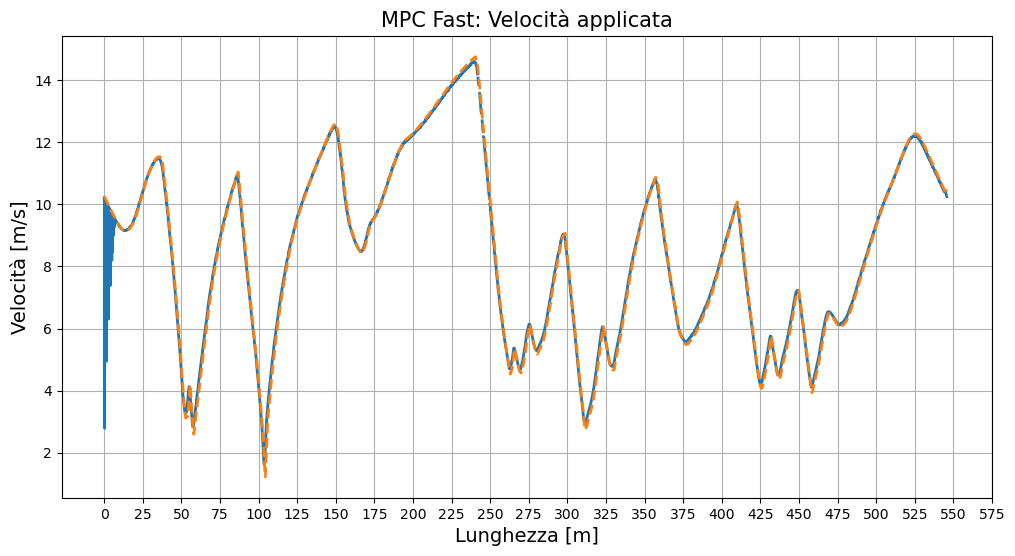

In [144]:
# Overlay the racetrack on the map
# load map yaml
if os.path.exists(f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"):
    map_img_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"
else:
    raise Exception("Map not found!")

map_yaml_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.yaml"
with open(map_yaml_path, 'r') as yaml_stream:
    try:
        map_metadata = yaml.safe_load(yaml_stream)
        map_resolution = map_metadata['resolution']
        origin = map_metadata['origin']
    except yaml.YAMLError as ex:
        print(ex)



# Normalize the color values
#norm = mcolors.Normalize(vmin=transformed_data_pp.loc[:, i].min(), vmax=transformed_data_pp.loc[:, i].max())


%matplotlib inline

# Assuming `i` is the index of the column containing theta values
#theta_values = transformed_data.loc[:, i].to_numpy()  # Replace with your actual theta values

%matplotlib inline
plt.figure(figsize=(12, 6))
plt.title("MPC Fast: Velocità applicata", fontsize=15)
#plt.axhline(y=0, color='orange', linestyle='--', linewidth=3)
# Assuming you have 2944 waypoints and each waypoint is 0.15m apart
num_waypoints = spa_length
distance_per_waypoint = 0.15
length = np.arange(0, num_waypoints * distance_per_waypoint, distance_per_waypoint)
plt.plot(length, raw_data.loc[:, 'speed'].to_numpy(), linewidth=2)
length = np.arange(0, num_waypoints * distance_per_waypoint, distance_per_waypoint)

plt.plot(length, original['speed'].to_numpy(), linestyle='--', linewidth=2)
plt.grid(True)

plt.xlabel('Lunghezza [m]', fontsize=14)  # Add x-axis label
plt.ylabel('Velocità [m/s]', fontsize=14)  # Add y-axis label
plt.xticks(np.arange(0, length[-1]+50, 25), fontsize=10)
plt.yticks(fontsize=10)  # Increase y-axis tick font size
#plt.ylim(theta_values.min() - 0.05, theta_values.max() + 0.03)
# Save the figure as an image file
plt.savefig('MPC Profiles Comparisons/MPC Fast Speed Spa.png', dpi=300, bbox_inches='tight')

plt.show()

## MPC Configurazione Safe

In [145]:
csv_files = glob.glob(f'/home/weins/sim_ws/csv/*spa*', recursive=False)
for i, x in enumerate(csv_files):
    print(f"[{i}]: {x}")

[0]: /home/weins/sim_ws/csv/pp_spa_controls_out.csv
[1]: /home/weins/sim_ws/csv/mpc_spa_hp_final_out.csv
[2]: /home/weins/sim_ws/csv/mpc_spa_hp_controls_out.csv
[3]: /home/weins/sim_ws/csv/mpc_spa_fast_final_out.csv
[4]: /home/weins/sim_ws/csv/mpc_spa_safe_controls_out.csv
[5]: /home/weins/sim_ws/csv/spa_pp_final_out.csv
[6]: /home/weins/sim_ws/csv/mpc_spa_safe_final_out.csv
[7]: /home/weins/sim_ws/csv/traj_race_spa_v2.csv
[8]: /home/weins/sim_ws/csv/traj_race_spa.csv
[9]: /home/weins/sim_ws/csv/spa_mpc_final_out.csv
[10]: /home/weins/sim_ws/csv/trajrace_pp_spa.csv
[11]: /home/weins/sim_ws/csv/mpc_spa_fast_controls_out.csv
[12]: /home/weins/sim_ws/csv/pp_spa_final_out.csv


In [146]:
# Select file index
row = 4

In [147]:
raw_data = pd.read_csv(csv_files[row], sep=',')
raw_data

,x,y,theta,speed,accel
0,11.357830,-66.062163,-0.004998,10.297596,-3.160892
1,11.390628,-66.008277,0.000288,10.294886,-3.388706
2,11.465689,-65.770295,-0.005824,10.261095,-3.058911
3,11.498294,-65.716253,-0.002368,10.256908,-3.240360
4,11.535515,-65.575680,-0.004338,10.234444,-3.015014
...,...,...,...,...,...
3635,11.122269,-66.687642,0.007256,10.403709,-2.263247
3636,11.168349,-66.548025,0.000901,10.370528,-3.096064
3637,11.245705,-66.353823,-0.001290,10.330277,-3.585698
3638,11.283597,-66.256634,-0.001722,10.315205,-3.661293


In [148]:
spa_length = len(pd.read_csv(csv_files[row], sep=','))
spa_length

3640

In [149]:
# Image resolution
size = 20 #40

# Select third dimention column index (color)
# [2] angle
# [3] velocity
# [4] acceleration
i = 'theta'

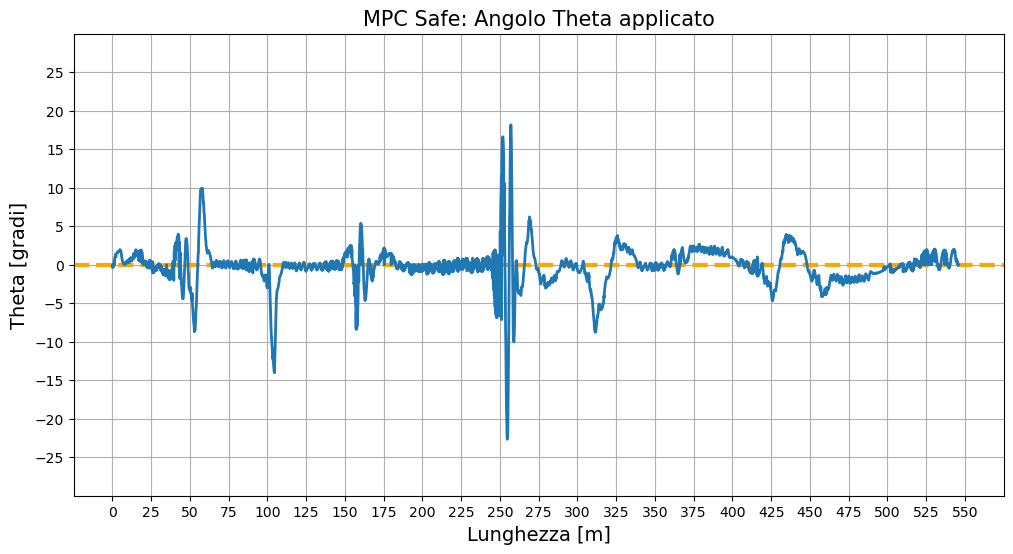

In [150]:
# Overlay the racetrack on the map
# load map yaml
if os.path.exists(f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"):
    map_img_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"
else:
    raise Exception("Map not found!")

map_yaml_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.yaml"
with open(map_yaml_path, 'r') as yaml_stream:
    try:
        map_metadata = yaml.safe_load(yaml_stream)
        map_resolution = map_metadata['resolution']
        origin = map_metadata['origin']
    except yaml.YAMLError as ex:
        print(ex)

# Normalize the color values
#norm = mcolors.Normalize(vmin=transformed_data_pp.loc[:, i].min(), vmax=transformed_data_pp.loc[:, i].max())


%matplotlib inline
# Assuming you have 2944 waypoints and each waypoint is 0.15m apart
num_waypoints = spa_length
distance_per_waypoint = 0.15
length = np.arange(0, num_waypoints * distance_per_waypoint, distance_per_waypoint)

# Assuming `i` is the index of the column containing theta values
theta_values = raw_data.loc[:, i].to_numpy()*180/np.pi

%matplotlib inline
plt.figure(figsize=(12, 6))
plt.title("MPC Safe: Angolo Theta applicato", fontsize=15)
plt.axhline(y=0, color='orange', linestyle='--', linewidth=3)
plt.plot(length, theta_values, linewidth=2)
plt.grid(True)

plt.xlabel('Lunghezza [m]', fontsize=14)  # Add x-axis label
plt.ylabel('Theta [gradi]', fontsize=14)  # Add y-axis label
plt.xticks(np.arange(0, length[-1] + 10, 25), fontsize=10)
plt.yticks(np.arange(-25, 26, 5), fontsize=10)  # Increase y-axis tick font size
plt.ylim(-30, 30)
plt.xlim(-25, 575)
# Save the figure as an image file
plt.savefig('MPC Profiles Comparisons/MPC Safe Theta Spa.png', dpi=300, bbox_inches='tight')

plt.show()

In [151]:
original = pd.read_csv(csv_files[7], sep=',', names=['x', 'y', 'theta', 'speed'])
original

,x,y,theta,speed
0,11.175317,-66.022806,-0.377448,10.267294
1,11.230135,-65.883709,-0.373357,10.251275
2,11.284422,-65.744271,-0.369176,10.235257
3,11.338161,-65.604497,-0.364904,10.219238
4,11.391333,-65.464394,-0.360540,10.203220
...,...,...,...,...
3635,10.949108,-66.579835,-0.394222,10.436610
3636,11.006471,-66.441106,-0.389941,10.436610
3637,11.063287,-66.302025,-0.385718,10.436610
3638,11.119566,-66.162592,-0.381553,10.436610


In [152]:
raw_data[(raw_data['theta'] == 0.0) & (raw_data['speed'] == 0.0) & (raw_data['accel'] == 0.0)] = np.nan
raw_data

,x,y,theta,speed,accel
0,11.357830,-66.062163,-0.004998,10.297596,-3.160892
1,11.390628,-66.008277,0.000288,10.294886,-3.388706
2,11.465689,-65.770295,-0.005824,10.261095,-3.058911
3,11.498294,-65.716253,-0.002368,10.256908,-3.240360
4,11.535515,-65.575680,-0.004338,10.234444,-3.015014
...,...,...,...,...,...
3635,11.122269,-66.687642,0.007256,10.403709,-2.263247
3636,11.168349,-66.548025,0.000901,10.370528,-3.096064
3637,11.245705,-66.353823,-0.001290,10.330277,-3.585698
3638,11.283597,-66.256634,-0.001722,10.315205,-3.661293


In [153]:
spa_length = len(pd.read_csv(csv_files[row], sep=','))
spa_length

3640

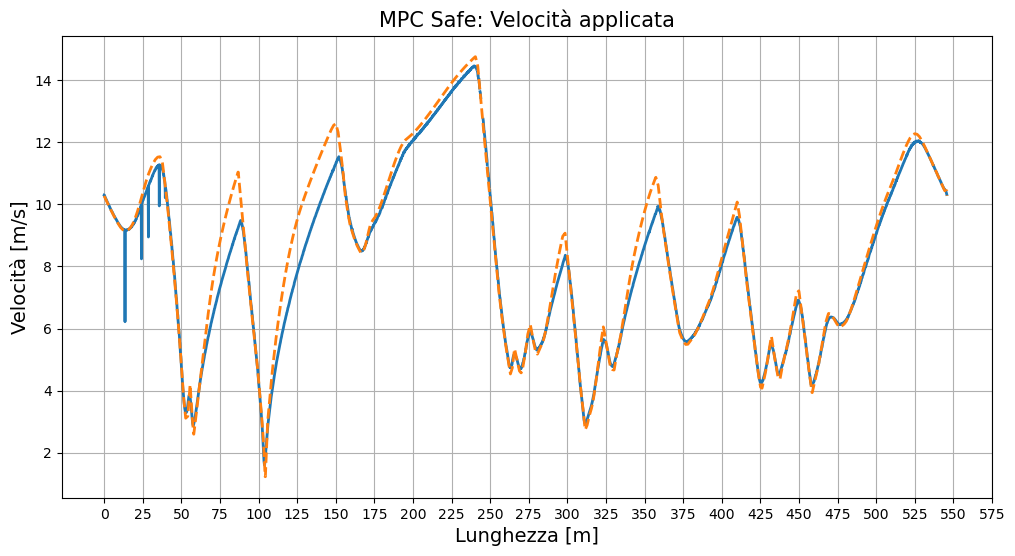

In [154]:
# Overlay the racetrack on the map
# load map yaml
if os.path.exists(f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"):
    map_img_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.png"
else:
    raise Exception("Map not found!")

map_yaml_path = f"/home/weins/sim_ws/src/f1tenth_gym_ros/maps/{MAP_NAME}.yaml"
with open(map_yaml_path, 'r') as yaml_stream:
    try:
        map_metadata = yaml.safe_load(yaml_stream)
        map_resolution = map_metadata['resolution']
        origin = map_metadata['origin']
    except yaml.YAMLError as ex:
        print(ex)



# Normalize the color values
#norm = mcolors.Normalize(vmin=transformed_data_pp.loc[:, i].min(), vmax=transformed_data_pp.loc[:, i].max())


%matplotlib inline

# Assuming `i` is the index of the column containing theta values
#theta_values = transformed_data.loc[:, i].to_numpy()  # Replace with your actual theta values

%matplotlib inline
plt.figure(figsize=(12, 6))
plt.title("MPC Safe: Velocità applicata", fontsize=15)
#plt.axhline(y=0, color='orange', linestyle='--', linewidth=3)
# Assuming you have 2944 waypoints and each waypoint is 0.15m apart
num_waypoints = spa_length
distance_per_waypoint = 0.15
length = np.arange(0, num_waypoints * distance_per_waypoint, distance_per_waypoint)
plt.plot(length, raw_data.loc[:, 'speed'].to_numpy(), linewidth=2)
length = np.arange(0, num_waypoints * distance_per_waypoint, distance_per_waypoint)

plt.plot(length, original['speed'].to_numpy(), linestyle='--', linewidth=2)
plt.grid(True)

plt.xlabel('Lunghezza [m]', fontsize=14)  # Add x-axis label
plt.ylabel('Velocità [m/s]', fontsize=14)  # Add y-axis label
plt.xticks(np.arange(0, length[-1]+50, 25), fontsize=10)
plt.yticks(fontsize=10)  # Increase y-axis tick font size
#plt.ylim(theta_values.min() - 0.05, theta_values.max() + 0.03)
# Save the figure as an image file
plt.savefig('MPC Profiles Comparisons/MPC Safe Speed Spa.png', dpi=300, bbox_inches='tight')

plt.show()

### Velocità delle 3 config

In [8]:
csv_files = glob.glob(f'/home/weins/sim_ws/csv/*spa*', recursive=False)
for i, x in enumerate(csv_files):
    print(f"[{i}]: {x}")

[0]: /home/weins/sim_ws/csv/pp_spa_controls_out.csv
[1]: /home/weins/sim_ws/csv/mpc_spa_hp_final_out.csv
[2]: /home/weins/sim_ws/csv/mpc_spa_hp_controls_out.csv
[3]: /home/weins/sim_ws/csv/mpc_spa_fast_final_out.csv
[4]: /home/weins/sim_ws/csv/mpc_spa_safe_controls_out.csv
[5]: /home/weins/sim_ws/csv/spa_pp_final_out.csv
[6]: /home/weins/sim_ws/csv/mpc_spa_safe_final_out.csv
[7]: /home/weins/sim_ws/csv/traj_race_spa_v2.csv
[8]: /home/weins/sim_ws/csv/traj_race_spa.csv
[9]: /home/weins/sim_ws/csv/spa_mpc_final_out.csv
[10]: /home/weins/sim_ws/csv/trajrace_pp_spa.csv
[11]: /home/weins/sim_ws/csv/mpc_spa_fast_controls_out.csv
[12]: /home/weins/sim_ws/csv/pp_spa_final_out.csv


In [9]:
ref_df = pd.read_csv(csv_files[7], sep=',', names=['x', 'y', 'theta', 'speed'])
ref_df

,x,y,theta,speed
0,11.175317,-66.022806,-0.377448,10.267294
1,11.230135,-65.883709,-0.373357,10.251275
2,11.284422,-65.744271,-0.369176,10.235257
3,11.338161,-65.604497,-0.364904,10.219238
4,11.391333,-65.464394,-0.360540,10.203220
...,...,...,...,...
3635,10.949108,-66.579835,-0.394222,10.436610
3636,11.006471,-66.441106,-0.389941,10.436610
3637,11.063287,-66.302025,-0.385718,10.436610
3638,11.119566,-66.162592,-0.381553,10.436610


In [10]:
safe_df = pd.read_csv(csv_files[4], sep=',')
safe_df

,x,y,theta,speed,accel
0,11.357830,-66.062163,-0.004998,10.297596,-3.160892
1,11.390628,-66.008277,0.000288,10.294886,-3.388706
2,11.465689,-65.770295,-0.005824,10.261095,-3.058911
3,11.498294,-65.716253,-0.002368,10.256908,-3.240360
4,11.535515,-65.575680,-0.004338,10.234444,-3.015014
...,...,...,...,...,...
3635,11.122269,-66.687642,0.007256,10.403709,-2.263247
3636,11.168349,-66.548025,0.000901,10.370528,-3.096064
3637,11.245705,-66.353823,-0.001290,10.330277,-3.585698
3638,11.283597,-66.256634,-0.001722,10.315205,-3.661293


In [11]:
safe_df[(safe_df['theta'] == 0.0) & (safe_df['speed'] == 0.0) & (safe_df['accel'] == 0.0)] = np.nan
safe_df

,x,y,theta,speed,accel
0,11.357830,-66.062163,-0.004998,10.297596,-3.160892
1,11.390628,-66.008277,0.000288,10.294886,-3.388706
2,11.465689,-65.770295,-0.005824,10.261095,-3.058911
3,11.498294,-65.716253,-0.002368,10.256908,-3.240360
4,11.535515,-65.575680,-0.004338,10.234444,-3.015014
...,...,...,...,...,...
3635,11.122269,-66.687642,0.007256,10.403709,-2.263247
3636,11.168349,-66.548025,0.000901,10.370528,-3.096064
3637,11.245705,-66.353823,-0.001290,10.330277,-3.585698
3638,11.283597,-66.256634,-0.001722,10.315205,-3.661293


In [12]:
fast_df = pd.read_csv(csv_files[11], sep=',')
fast_df

,x,y,theta,speed,accel
0,11.315927,-66.097466,0.006560,10.209031,-1.113191
1,11.386573,-65.903329,0.011303,10.192009,-0.567419
2,11.298833,-65.698166,0.011031,2.790000,3.000000
3,11.456196,-65.709588,0.014663,10.170479,-0.717650
4,11.524919,-65.516232,0.016846,10.146655,-0.794144
...,...,...,...,...,...
3635,11.135069,-66.584200,-0.001308,10.320083,-1.547493
3636,11.163162,-66.485015,0.032253,10.294699,-0.776564
3637,11.208204,-66.389404,0.001351,10.286163,-1.130668
3638,11.244363,-66.292009,0.002994,10.242427,-1.457850


In [13]:
fast_df[(fast_df['theta'] == 0.0) & (fast_df['speed'] == 0.0) & (fast_df['accel'] == 0.0)] = np.nan
fast_df

,x,y,theta,speed,accel
0,11.315927,-66.097466,0.006560,10.209031,-1.113191
1,11.386573,-65.903329,0.011303,10.192009,-0.567419
2,11.298833,-65.698166,0.011031,2.790000,3.000000
3,11.456196,-65.709588,0.014663,10.170479,-0.717650
4,11.524919,-65.516232,0.016846,10.146655,-0.794144
...,...,...,...,...,...
3635,11.135069,-66.584200,-0.001308,10.320083,-1.547493
3636,11.163162,-66.485015,0.032253,10.294699,-0.776564
3637,11.208204,-66.389404,0.001351,10.286163,-1.130668
3638,11.244363,-66.292009,0.002994,10.242427,-1.457850


In [14]:
hp_df = pd.read_csv(csv_files[2], sep=',')
hp_df

,x,y,theta,speed,accel
0,11.267927,-66.087634,-0.016620,9.771721,-4.409007
1,11.334710,-65.899450,-0.015908,9.861721,3.000000
2,11.400086,-65.711864,-0.010511,9.951721,3.000000
3,11.423581,-65.680772,-0.015853,9.976995,0.048727
4,11.464328,-65.524712,-0.005033,9.945706,-0.200492
...,...,...,...,...,...
3635,11.093596,-66.559675,-0.024025,9.990857,-2.837657
3636,11.089653,-66.517168,0.027671,9.928684,-3.939467
3637,11.164661,-66.370828,-0.021305,9.875730,-3.837569
3638,11.233956,-66.181864,-0.020160,9.903991,0.942054


In [15]:
hp_df[(hp_df['theta'] == 0.0) & (hp_df['speed'] == 0.0) & (hp_df['accel'] == 0.0)] = np.nan
hp_df

,x,y,theta,speed,accel
0,11.267927,-66.087634,-0.016620,9.771721,-4.409007
1,11.334710,-65.899450,-0.015908,9.861721,3.000000
2,11.400086,-65.711864,-0.010511,9.951721,3.000000
3,11.423581,-65.680772,-0.015853,9.976995,0.048727
4,11.464328,-65.524712,-0.005033,9.945706,-0.200492
...,...,...,...,...,...
3635,11.093596,-66.559675,-0.024025,9.990857,-2.837657
3636,11.089653,-66.517168,0.027671,9.928684,-3.939467
3637,11.164661,-66.370828,-0.021305,9.875730,-3.837569
3638,11.233956,-66.181864,-0.020160,9.903991,0.942054


In [19]:
spa_length = len(pd.read_csv(csv_files[7], sep=','))+1
spa_length

3640

In [18]:
# Assuming `i` is the index of the column containing theta values
#theta_values = transformed_data.loc[:, i].to_numpy()  # Replace with your actual theta values

%matplotlib qt
plt.figure(figsize=(12, 6))
#plt.title("Confronti: Velocità applicata", fontsize=15)
#plt.axhline(y=0, color='orange', linestyle='--', linewidth=3)
# Assuming you have 2944 waypoints and each waypoint is 0.15m apart
dim = 10
num_waypoints = spa_length
distance_per_waypoint = 0.15
length = np.arange(0, num_waypoints * distance_per_waypoint, distance_per_waypoint)[::dim]
distance_per_waypoint_pp = 0.5
length_pp = np.arange(0, ((spa_pp_length)+1) * distance_per_waypoint_pp, distance_per_waypoint_pp)[::dim]
plt.plot(length_pp, raw_data_pp.loc[::dim, 'speed'].to_numpy(), label='Pure Pursuit', linewidth=2, color="#4046ca")
plt.plot(length, ref_df.loc[::dim, 'speed'].to_numpy(), label='Raceline', linewidth=2, color="#008f5d")
plt.plot(length, hp_df.loc[::dim, 'speed'].to_numpy(), label='High Performance', linewidth=2, color="#de3d82")
plt.plot(length, fast_df.loc[::dim, 'speed'].to_numpy(), label='Fast', linewidth=2, color="#f68511")
plt.plot(length, safe_df.loc[::dim, 'speed'].to_numpy(), label='Safe', linewidth=2, color="#7e84fa")
plt.grid(True)

plt.xlabel('Lunghezza [m]', fontsize=14)  # Add x-axis label
plt.ylabel('Velocità [m/s]', fontsize=14)  # Add y-axis label
plt.xticks(np.arange(0, length[-1]+50, 100), fontsize=10)
plt.yticks(np.arange(0, 20, 2.5), fontsize=10)  # Increase y-axis tick font size
plt.ylim(0, 20)
# Save the figure as an image file

plt.legend(title='Metodi', fontsize=12, title_fontsize='14')
plt.savefig('MPC Profiles Comparisons/spa_mpc_speed_comparisons.png', dpi=300, bbox_inches='tight')
plt.show()

Angolo

In [19]:
def car_angle(df):
    def to_deg_in(x):
        return abs(x)*180/np.pi
    car_a = [0]
    i = 1
    while i < len(df):
        car_a.append(to_deg_in(df.loc[i, 'theta']) - to_deg_in(df.loc[i-1, 'theta']))
        i += 1
    s = pd.Series(car_a)
    return s[(s<180)&(s>-180)]


def to_deg(x):
    return x*180/np.pi

In [20]:
# Assuming `i` is the index of the column containing theta values
#theta_values = transformed_data.loc[:, i].to_numpy()  # Replace with your actual theta values

#%matplotlib inline
%matplotlib qt
plt.figure(figsize=(12, 6))
#plt.title("Confronti: Angolo di sterzata applicato", fontsize=15)
#plt.axhline(y=0, color='orange', linestyle='--', linewidth=3)
# Assuming you have 2944 waypoints and each waypoint is 0.15m apart
dim = 7
length = np.arange(0, num_waypoints * distance_per_waypoint, distance_per_waypoint)[::dim]
hp_theta = to_deg(hp_df.loc[::dim, 'theta'].to_numpy())
fast_theta = to_deg(fast_df.loc[::dim, 'theta'].to_numpy())
safe_theta = to_deg(safe_df.loc[::dim, 'theta'].to_numpy())
pp_theta = to_deg(raw_data_pp.loc[::dim, 'theta'].to_numpy())
ref_theta = car_angle(ref_df)[::dim].to_numpy()

distance_per_waypoint_pp = 0.5
length_pp = np.arange(0, ((spa_pp_length-1)) * distance_per_waypoint_pp, distance_per_waypoint_pp)[::dim]

plt.plot(length_pp, pp_theta, label='Pure Pursuit', linewidth=2, color="#4046ca")
#plt.plot(length, ref_theta, label='Raceline', linewidth=2, color="#008f5d")
plt.plot(length, hp_theta, label='High Performance', linewidth=2, color="#de3d82")
plt.plot(length, fast_theta, label='Fast', linewidth=2, color="#f68511")
plt.plot(length, safe_theta, label='Safe', linewidth=2, color="#7e84fa")
plt.grid(True)

plt.xlabel('Lunghezza [m]', fontsize=14)  # Add x-axis label
plt.ylabel('Angolo $\delta$ [gradi]', fontsize=14)  # Add y-axis label
plt.xticks(np.arange(0, length[-1]+50, 100), fontsize=10)
plt.yticks(np.arange(-25, 26, 5), fontsize=10)  # Increase y-axis tick font size
plt.ylim(-30, 30)
plt.xlim(-25, 575)
# Save the figure as an image file

plt.legend(title='Metodi', fontsize=12, title_fontsize='14', loc='upper center', bbox_to_anchor=(0.5, 1.015), ncol=5)
plt.savefig('MPC Profiles Comparisons/spa_mpc_theta_comparisons.png', dpi=300, bbox_inches='tight')
plt.show()